Zonal Statistics on Case Studies

In [5]:
# Packages and paths
# %%
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gp
import scipy.stats as sp
import sys
import rasterio
from rasterio.mask import mask

# Add the path to the Utils folder
utils_path = os.path.abspath(os.path.join('..', 'Utils'))
if utils_path not in sys.path:
    sys.path.append(utils_path)

# Now you can import the functions from CustomFunctions.py
import CustomFunctions as cf

# Local paths
datapath = '../../Data'
inputpath = '../../Data/Input'
outputpath = '../../Data/Output/Local'
shapepath = inputpath+'/Shapefiles'
figurepath = '../../Figures/Local'

shapepath_web = 'https://data.cyverse.org/dav-anon/iplant/home/dtadych/Miscellaneous/'

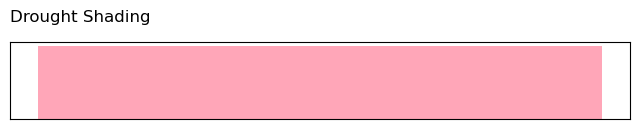

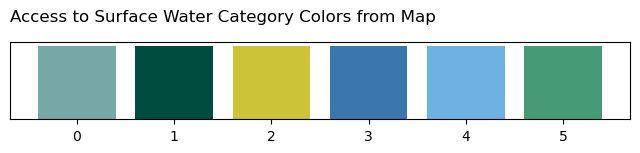

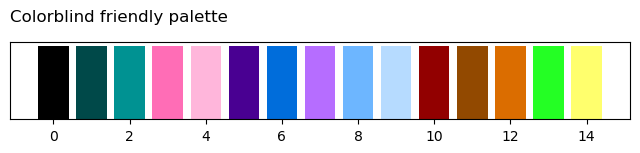

In [6]:
# %% Creating colors
drought_color = '#ffa6b8'

# Color blind palette
# https://jacksonlab.agronomy.wisc.edu/2016/05/23/15-level-colorblind-friendly-palette/
cblind =["#000000","#004949","#009292","#ff6db6","#ffb6db",
 "#490092","#006ddb","#b66dff","#6db6ff","#b6dbff",
 "#920000","#924900","#db6d00","#24ff24","#ffff6d"]

# Colors from map
cap = '#77A8A5' #'#C6652B'
cap_secondary = '#004D40'
# noCAP = '#EDE461' # This is one from the map in the trend paper
noCAP = '#CCC339' # This color but darker for lines
GWdom = '#3B76AF'
mixed = '#6EB2E4'
swdom = '#469B76'
a2sw_colors =[cap,cap_secondary,noCAP,GWdom,mixed,swdom]

# Create a bar plot to visualize colors
palette = [drought_color]
fig, ax = plt.subplots(figsize=(8, 1))
ax.bar(range(len(palette)), height=1, color=palette)
ax.set_title('Drought Shading',loc='left',pad=15)
# Remove y-axis
ax.set_yticks([])
ax.set_xticks([])
plt.show()

palette = a2sw_colors
fig, ax = plt.subplots(figsize=(8, 1))
ax.bar(range(len(palette)), height=1, color=palette)
ax.set_title('Access to Surface Water Category Colors from Map',loc='left',pad=15)
# Remove y-axis
ax.set_yticks([])
plt.show()

palette = cblind
fig, ax = plt.subplots(figsize=(8, 1))
ax.bar(range(len(palette)), height=1, color=palette)
ax.set_title('Colorblind friendly palette',loc='left',pad=15)
# Remove y-axis
ax.set_yticks([])
plt.show()

<Axes: >

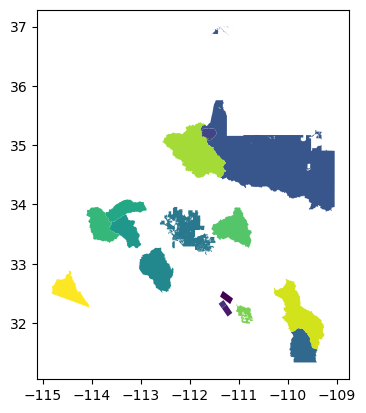

In [3]:
# Read in the shapefile

# filename_shapeile = 'georeg_reproject_fixed.shp'
filename_shapeile = 'AllCaseStudies.shp'
# filepath = os.path.join(shapepath, filename_shapeile)
filepath = os.path.join(shapepath_web, filename_shapeile)
shapefile = gp.read_file(filepath)
shapefile.plot(cmap='viridis')


In [14]:
cdl_tif_name = "CDL_2021_clip_20240304192246_1147031484.tif"
tifpath = shapepath+'/CDL_2021/'
raster_path = tifpath+cdl_tif_name

In [15]:
with rasterio.open(raster_path) as src:
    raster_data = src.read(1)  # Reading the first band
    raster_crs = src.crs

In [11]:
src

<closed DatasetReader name='../../Data/Input/Shapefiles/CDL_2021/CDL_2021_clip_20240304192246_1147031484.tif' mode='r'>

In [12]:
# Function to calculate land use percentages within each case study shape
def calculate_landuse_percentages(raster, shapes, affine):
    out_image, out_transform = mask(raster, shapes, crop=True)
    unique, counts = np.unique(out_image, return_counts=True)
    landuse_percentages = dict(zip(unique, (counts / counts.sum()) * 100))
    return landuse_percentages

<Axes: >

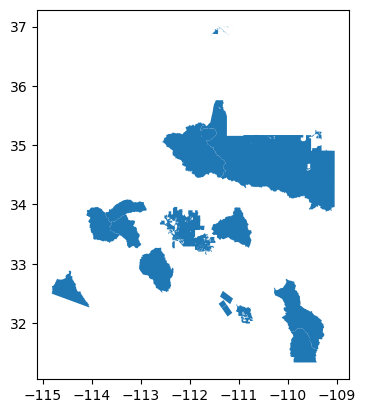

In [13]:
case_studies = shapefile
case_studies.plot()

In [18]:
# Loop through each case study area and calculate percentages
land_use_results = []
for i, row in case_studies.iterrows():
    # Extract the geometry
    geometry = [row['geometry']]
    
    # Mask the raster with the case study polygon
    with rasterio.open(raster_path) as src:
        out_image, out_transform = mask(src, geometry, crop=True)
    
    # Flatten the raster values to a 1D array and remove nodata values
    flattened = out_image.flatten()
    flattened = flattened[flattened != src.nodata]
    
    # Calculate the percentages of each land use type
    unique, counts = np.unique(flattened, return_counts=True)
    percentages = {u: (count / sum(counts)) * 100 for u, count in zip(unique, counts)}
    
    # Save the results
    land_use_results.append({'case_study': row['Name'], 'land_use_percentages': percentages})


In [19]:
# Print the results for each case study
for result in land_use_results:
    print(f"Case Study: {result['case_study']}")
    for land_use_type, percentage in result['land_use_percentages'].items():
        print(f"Land Use Type {land_use_type}: {percentage:.2f}%")

Case Study: GSF/USF
Land Use Type 0: 54.42%
Land Use Type 1: 0.57%
Land Use Type 2: 5.26%
Land Use Type 4: 0.01%
Land Use Type 21: 0.64%
Land Use Type 22: 1.35%
Land Use Type 24: 0.00%
Land Use Type 28: 0.00%
Land Use Type 36: 2.09%
Land Use Type 37: 0.04%
Land Use Type 44: 0.00%
Land Use Type 48: 0.00%
Land Use Type 59: 0.00%
Land Use Type 61: 3.99%
Land Use Type 74: 0.03%
Land Use Type 111: 0.01%
Land Use Type 121: 3.45%
Land Use Type 122: 1.65%
Land Use Type 123: 0.69%
Land Use Type 124: 0.22%
Land Use Type 131: 0.49%
Land Use Type 152: 24.11%
Land Use Type 176: 0.62%
Land Use Type 190: 0.27%
Land Use Type 195: 0.07%
Land Use Type 205: 0.00%
Land Use Type 209: 0.00%
Land Use Type 225: 0.00%
Land Use Type 226: 0.00%
Case Study: USF
Land Use Type 0: 51.95%
Land Use Type 1: 0.03%
Land Use Type 2: 0.98%
Land Use Type 21: 0.02%
Land Use Type 22: 1.12%
Land Use Type 24: 0.00%
Land Use Type 36: 0.04%
Land Use Type 37: 0.00%
Land Use Type 61: 0.27%
Land Use Type 74: 0.03%
Land Use Type 111:

In [21]:
type(land_use_results)

list

In [22]:
import pandas as pd

# Initialize a dictionary to store results
land_use_data = {}

# Loop through each case study and calculate percentages as before
for i, row in case_studies.iterrows():
    # Extract the geometry
    geometry = [row['geometry']]
    
    # Mask the raster with the case study polygon
    with rasterio.open(raster_path) as src:
        out_image, out_transform = mask(src, geometry, crop=True)
    
    # Flatten the raster values to a 1D array and remove nodata values
    flattened = out_image.flatten()
    flattened = flattened[flattened != src.nodata]
    
    # Calculate the percentages of each land use type
    unique, counts = np.unique(flattened, return_counts=True)
    percentages = {u: (count / sum(counts)) * 100 for u, count in zip(unique, counts)}
    
    # Add the result to the dictionary for the DataFrame
    land_use_data[row['Name']] = percentages

# Convert the dictionary to a DataFrame
df = pd.DataFrame(land_use_data).fillna(0)

# Rename the index to 'Land Use Type'
df.index.name = 'Land Use Type'

# Show the DataFrame
print(df)


                 GSF/USF        USF    Control  Flagstaff  LittleCoR  \
Land Use Type                                                          
0              54.416588  51.951041  49.318918  19.689411  72.364839   
1               0.569156   0.027566   0.007557   0.000000   0.000000   
2               5.263713   0.975397   1.017372   0.000000   0.000005   
4               0.011255   0.000000   0.000000   0.000000   0.000000   
21              0.641507   0.015998   0.000472   0.000000   0.000000   
...                  ...        ...        ...        ...        ...   
231             0.000000   0.000000   0.000000   0.000000   0.000000   
232             0.000000   0.000000   0.000000   0.000000   0.000000   
233             0.000000   0.000000   0.000000   0.000000   0.000000   
245             0.000000   0.000000   0.000000   0.000000   0.000000   
246             0.000000   0.000000   0.000000   0.000000   0.000000   

                 Douglas    Phoenix   GilaBend  Harquahala   Mc

In [23]:
df.to_csv(outputpath+'CaseStudy_LanduseStats.csv')

This is for calculating population stats

<Axes: >

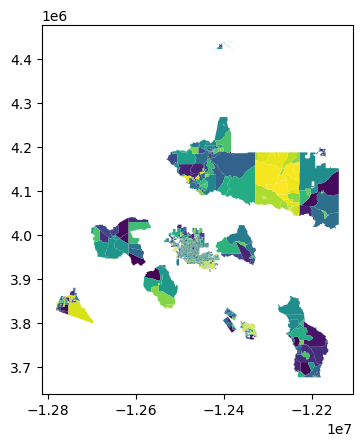

In [24]:
# Read in the shapefile

filename_shapeile = 'Case_Studies_Demographics_Population.shp'
filepath = os.path.join(shapepath, filename_shapeile)
demos = gp.read_file(filepath)
demos.plot(cmap='viridis')

In [26]:
demos.columns

Index(['sqft', 'sqmi', 'acres', 'geoid20', 'state_fips', 'state', 'county_fip',
       'county', 'tract', 'blkgrp', 'total_pop', 'hh_pop', 'gq_pop',
       'total_hh', 'pph', 'total_hu', 'occupied_h', 'vacant_hu', 'vr', 'white',
       'black', 'native', 'asian', 'pacific', 'other', 'two_or_mor',
       'hispanic', 'not_hispan', 'white_nh', 'black_nh', 'native_nh',
       'asian_nh', 'pacific_nh', 'other_nh', 'two_or_m_1', 'white_h',
       'black_h', 'native_h', 'asian_h', 'pacific_h', 'other_h', 'two_or_m_2',
       'minority_p', 'age_0_17', 'age_18_plu', 'gq_pop_in_', 'gq_pop_juv',
       'gq_pop_nur', 'gq_pop_oth', 'gq_pop_dor', 'gq_pop_mil', 'gq_pop_o_1',
       'Name', 'FID', 'AMA_CODE', 'SUBBASIN_N', 'NAME_ABBR', 'SUBBASIN_1',
       'SHAPEAREA', 'layer', 'path', 'Labels', 'geometry'],
      dtype='object')

In [28]:
population_df = demos.groupby('Labels')['total_pop'].sum().reset_index()

# Convert the grouped data into a DataFrame for easier manipulation
population_pivot = pd.pivot_table(population_df, values='total_pop', index='Labels')
population_pivot

,total_pop
Labels,
Control,6611
Douglas AMA,31685
Flagstaff,95737
GSF/USF,43443
Gila Bend,10400
Harquahala INA,6187
Little Colorado River,130728
McMullen,5387
Phoenix (Urban),4218944


In [29]:
population_pivot.to_csv(outputpath+"CaseStudyPopulationTotals.csv")